In [3]:
import sys
sys.path.append(r"C:\Users\user\labcode\hp4155")

import module
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

V2_stress=10 #vds
V3_stress=-12 #vgs
stress_time=10
V2_sampling=10
V3_sampling=2
sampling_mode='L10',
number_of_points=21
integration_time='MED'
str_comp = 0.1
samp_Vgs_comp = 10**(-3)
samp_Vds_comp= 0.1

In [4]:
#connect to device
device = module.HP4155a('GPIB0::17::INSTR')
device.reset()
    
device.stress_page()
    
#define smus to numbers in mode and values for stress 

#mode
device.smu_mode(1,'COMM')
device.smu_mode(2,'V')
device.comp_stress(2,str_comp)
device.smu_mode(3,'V')
device.comp_stress(3,str_comp)
device.smu_mode(4,'COMM')
device.sync(4,0)

#names 
device.str_smu_name(2,'VD')
device.str_smu_name(3,'VG')
#values
device.smu_value(2,V2_stress)
device.smu_value(3,V3_stress)
#time
device.stress_time(stress_time)
    
device.start_stress()
while device.operation_completed() == False:
    pass

In [6]:
#start with sampling measurement
device.measurement_mode('SAMP')

#set the mode of smus for sampling
device.smu_mode_meas(1,'COMM')
device.smu_mode_meas(2,'V')
device.smu_mode_meas(3,'V')
device.smu_mode_meas(4,'COMM')


#set the names of the smus
device.smu_vname(1,'VS1')
device.smu_iname(1,'IS1')
device.smu_vname(2,'VDS')
device.smu_iname(2,'ID')
device.smu_vname(3,'VGS')
device.smu_iname(3,'IG')
device.smu_vname(4,'VS2')
device.smu_iname(4,'IS2')



#set the values of smu for sampling
device.constant_smu_sampling(2,V2_sampling)
device.constant_smu_sampling(3,V3_sampling)
    

#time log10
device.sampling_mode(sampling_mode)

#minimum initial interval
#device.initial_interval(2*10**(-3))

device.number_of_points(number_of_points)
device.integration_time(integration_time)

device.display_variable('X','@TIME')
device.display_variable('Y1','ID')
device.display_variable('Y2','IG')

device.constant_smu_comp(2,samp_Vds_comp)
device.constant_smu_comp(3,samp_Vgs_comp)
device.single_measurement()
while device.operation_completed() == False:
    pass
device.autoscaling()

time = device.return_data('@TIME')
IG = device.return_data('IG')
ID = device.return_data('ID')

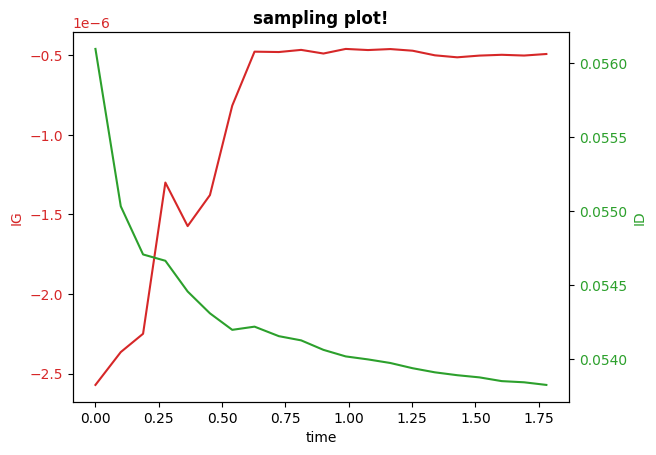

In [7]:
fig, ax1 = plt.subplots() 
 
color = 'tab:red'
ax1.set_xlabel('time') 
ax1.set_ylabel('IG', color = color) 
ax1.plot(time, IG, color = color) 
ax1.tick_params(axis ='y', labelcolor = color) 
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
 
color = 'tab:green'
ax2.set_ylabel('ID', color = color) 
ax2.plot(time, ID, color = color) 
ax2.tick_params(axis ='y', labelcolor = color) 
 
# Adding title
plt.title('sampling plot!', fontweight ="bold") 
 
# Show plot
plt.show()